# Prerequisite
* Load required packages and load images (already uploaded on Blackboard) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY numpy and tensorflow/pytorch functions for any type of operations**  

* **Do not use any built-in opencv or anyother such function**


In [3]:
import tensorflow as tf
import numpy as np
from scipy import ndimage as nd
from scipy import interpolate as inter
from matplotlib import pyplot as plt
import imageio.v2 as imageio

#a)Load 'barbara.jpg'


Original Data_type is uint8
Data_type is float32
Image Size is (510, 510)
Image min and max are (0.0, 255.0)


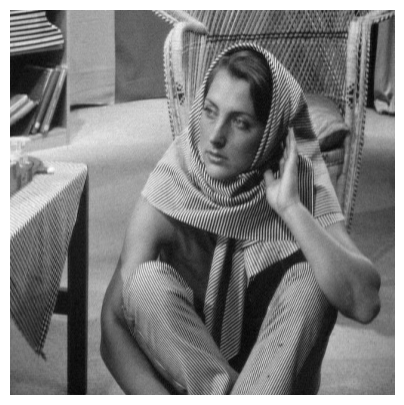

In [5]:
img_path = 'barbara.jpg'
img_a0 = imageio.imread(img_path)
# img_a0 = tf.convert_to_tensor(img_a0, dtype=tf.float32)
# img_a = tf.image.rgb_to_grayscale(img_a0)
img_a = img_a0.astype(np.float32)
print('Original Data_type is {}'.format(img_a0.dtype))
print('Data_type is', img_a.dtype)
print('Image Size is {}'.format(img_a.shape))
print('Image min and max are ({}, {})'.format(img_a.min(),img_a.max()))
#################################################
plt.figure(figsize=(5,5))
plt.imshow(img_a, cmap='gray')
plt.axis('off')
plt.show()

#b) Apply DFT to a)

In [6]:
img_b = np.fft.fft2(img_a)
#################################################
print('FFT Data_type is {}'.format(img_b.dtype))
print('FFT Size is {}'.format(img_b.shape))
print('FFT min and max are ({}, {})'.format(img_b.min(),img_b.max()))
#################################################

FFT Data_type is complex64
FFT Size is (510, 510)
FFT min and max are ((-1773421-1478407.125j), (29760476+0j))


In [7]:
#a = -1449185.750472431+241803.37904497175j
#b = np.abs(a)
#print(a)
#print(b)
img_b_mod = np.abs(img_b)
#################################################
print('mod-FFT Data_type is {}'.format(img_b_mod.dtype))
print('mod-FFT Size is {}'.format(img_b_mod.shape))
print('mod-FFT min and max are ({}, {})'.\
      format(img_b_mod.min(),img_b_mod.max()))
print('log mod-FFT min and max are ({}, {})'.\
      format(np.log2(1+img_b_mod.min()),np.log2(1+img_b_mod.max()) ))
#################################################

mod-FFT Data_type is float32
mod-FFT Size is (510, 510)
mod-FFT min and max are (0.7224043011665344, 29760476.0)
log mod-FFT min and max are (0.7844237685203552, 24.826894760131836)


#c) Apply log to FFT

In [8]:
min_lb = np.log2(1+img_b_mod.min())
max_lb = np.log2(1+img_b_mod.max())

img_b_lm = np.log2(1+img_b_mod)
img_c = (img_b_lm-min_lb) / (max_lb - min_lb)
img_c = 255.0*img_c
#################################################
print('lm-FFT Data_type is {}'.format(img_c.dtype))
print('mod-FFT Size is {}'.format(img_c.shape))
print('mod-FFT min and max are ({}, {})'.format(img_c.min(),img_c.max()))
#################################################

lm-FFT Data_type is float32
mod-FFT Size is (510, 510)
mod-FFT min and max are (0.0, 255.0)


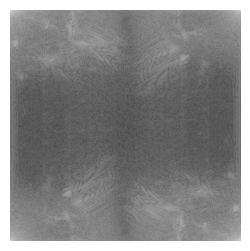

In [9]:
plt.figure(figsize=(3,3))
plt.imshow(img_c, cmap='gray')
plt.axis('off')
plt.show()

#d) Apply fft-shift to image a) and then apply fft

In [10]:
img_fft_a = np.fft.fft2(img_a)
img_d = np.fft.fftshift(img_fft_a)
#################################################
print('shift-FFT Data_type is {}'.format(img_d.dtype))
print('shift-FFT Size is {}'.format(img_d.shape))
print('shift-FFT min and max are ({}, {})'.format(img_d.min(),img_d.max()))
#################################################

shift-FFT Data_type is complex64
shift-FFT Size is (510, 510)
shift-FFT min and max are ((-1773421-1478407.125j), (29760476+0j))


In [11]:
img_d_mod = np.abs(img_d)
min_ld = np.log2(1+img_d_mod.min())
max_ld = np.log2(1+img_d_mod.max())

img_d_lm = np.log2(1+img_d_mod)
img_e = (img_d_lm-min_ld) / (max_ld - min_ld)
img_e = 255.0*img_e
#################################################
print('shift-lm-FFT Data_type is {}'.format(img_e.dtype))
print('shift-mod-FFT Size is {}'.format(img_e.shape))
print('shift-mod-FFT min and max are ({}, {})'.format(img_e.min(),img_e.max()))
#################################################

shift-lm-FFT Data_type is float32
shift-mod-FFT Size is (510, 510)
shift-mod-FFT min and max are (0.0, 255.0)


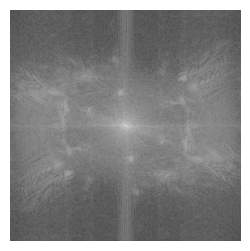

In [12]:
plt.figure(figsize=(3,3))
plt.imshow(img_e, cmap='gray')
plt.axis('off')
plt.show()

#f)Creating meshgrid for coordinate locations

In [13]:

print(img_a0.shape)
c_x = np.floor(img_a0.shape[0]/2)
c_y = np.floor(img_a0.shape[1]/2)
print((c_x,c_y))
[ii,jj] = np.meshgrid(range(img_a0.shape[0]), \
                      range(img_a0.shape[1]),indexing='ij')
print(ii)
print(jj)

(510, 510)
(np.float64(255.0), np.float64(255.0))
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [507 507 507 ... 507 507 507]
 [508 508 508 ... 508 508 508]
 [509 509 509 ... 509 509 509]]
[[  0   1   2 ... 507 508 509]
 [  0   1   2 ... 507 508 509]
 [  0   1   2 ... 507 508 509]
 ...
 [  0   1   2 ... 507 508 509]
 [  0   1   2 ... 507 508 509]
 [  0   1   2 ... 507 508 509]]


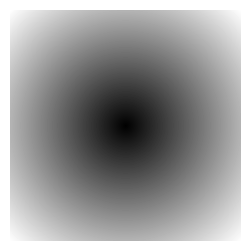

In [14]:
dist = np.sqrt(np.power(ii-c_x,2) + np.power(jj-c_y,2))
plt.figure(figsize=(3,3))
plt.imshow(dist, cmap='gray')
plt.axis('off')
plt.show()

#g) creating Ideal Low pass filter of radius 80

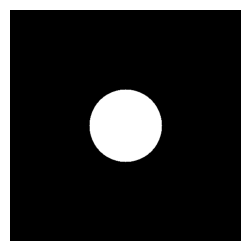

In [15]:
H_low = (dist <= 80)
plt.figure(figsize=(3,3))
plt.imshow(H_low, cmap='gray')
plt.axis('off')
plt.show()

#h)Apply low pass filter to a)

In [16]:
fft_low_shifted = img_d*H_low  # convolution spatial domain
fft_low = np.fft.ifftshift(fft_low_shifted)
img_low = np.fft.ifft2(fft_low)
print('Data_type is', img_low.dtype)
print('Image Size is {}'.format(img_low.shape))
print('Image min and max are ({}, {})'.format(img_low.min(),img_low.max()))

img_low = img_low.real
print('Data_type is', img_low.dtype)
print('Image Size is {}'.format(img_low.shape))
print('Image min and max are ({}, {})'.format(img_low.min(),img_low.max()))


Data_type is complex64
Image Size is (510, 510)
Image min and max are ((-7.386183261871338-7.262200597324409e-06j), (264.50921630859375+1.0376803629696951e-06j))
Data_type is float32
Image Size is (510, 510)
Image min and max are (-7.386183261871338, 264.50921630859375)


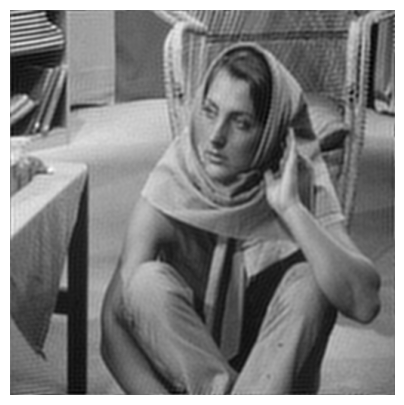

In [17]:
plt.figure(figsize=(5,5))
plt.imshow(img_low, cmap='gray')
plt.axis('off')
plt.show()

#Q1.a) load 'barbara_noisy02.jpg' and calculate its shifted DFT. Display it using log-transform [0 Marks]

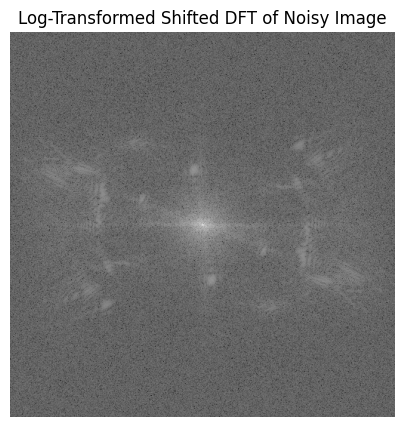

In [18]:
# Load 'barbara_noisy02.jpg'
img_noisy_path = 'barbara_noisy02.jpg'
img_noisy = imageio.imread(img_noisy_path).astype(np.float32)

# Compute 2D Fourier Transform and shift it
img_noisy_fft = np.fft.fft2(img_noisy)
img_noisy_fft_shifted = np.fft.fftshift(img_noisy_fft)

# Compute magnitude spectrum and apply log transform
img_noisy_magnitude = np.abs(img_noisy_fft_shifted)
img_noisy_log = np.log2(1 + img_noisy_magnitude)

# Normalize log transform for better visualization
min_log = img_noisy_log.min()
max_log = img_noisy_log.max()
img_noisy_log_norm = 255 * (img_noisy_log - min_log) / (max_log - min_log)

# Display the log-transformed spectrum
plt.figure(figsize=(5,5))
plt.imshow(img_noisy_log_norm, cmap='gray')
plt.axis('off')
plt.title("Log-Transformed Shifted DFT of Noisy Image")
plt.show()


#Q1.b) Apply Ideal Low Pass Filter with radius 80 to Q1.a) image [0 Marks]

---



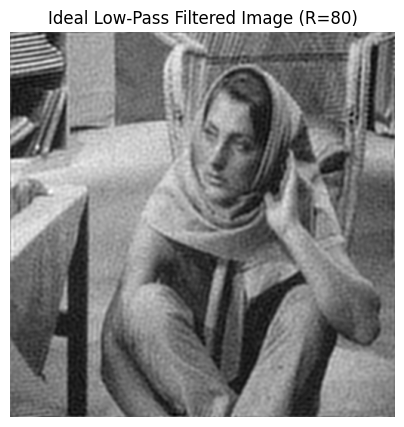

In [19]:
# Apply the existing Ideal Low-Pass Filter (H_low) to the shifted DFT of noisy image
fft_low_shifted = img_noisy_fft_shifted * H_low  

# Compute inverse DFT
fft_low = np.fft.ifftshift(fft_low_shifted)  # Inverse shift
img_low = np.fft.ifft2(fft_low)  # Inverse FFT
img_low = np.real(img_low)  # Take real part

# Display the filtered image
plt.figure(figsize=(5,5))
plt.imshow(img_low, cmap='gray')
plt.axis('off')
plt.title("Ideal Low-Pass Filtered Image (R=80)")
plt.show()


#Q1.c) Apply Butterworth Lowpass Filter with $D_0=60$ to Q1.a) image by creating your own function  [2 Marks]

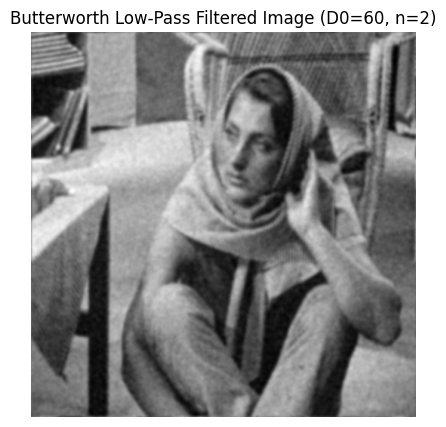

In [24]:
def butterworth_lowpass_filter(shape, D0, n=2):
    """Creates a Butterworth Low-Pass Filter."""
    c_x, c_y = np.floor(shape[0] / 2), np.floor(shape[1] / 2)
    ii, jj = np.meshgrid(range(shape[0]), range(shape[1]), indexing='ij')
    dist = np.sqrt((ii - c_x) ** 2 + (jj - c_y) ** 2)
    
    H_butterworth = 1 / (1 + (dist / D0) ** (2 * n))  # Butterworth formula
    return H_butterworth

# Generate Butterworth LPF with D0 = 60
H_butterworth = butterworth_lowpass_filter(img_noisy.shape, D0=60, n=2)

# Apply Butterworth filter in frequency domain
fft_butter_shifted = img_noisy_fft_shifted * H_butterworth

# Compute inverse DFT
fft_butter = np.fft.ifftshift(fft_butter_shifted)  # Inverse shift
img_butter = np.fft.ifft2(fft_butter)  # Inverse FFT
img_butter = np.real(img_butter)  # Take real part

# Display the Butterworth filtered image
plt.figure(figsize=(5,5))
plt.imshow(img_butter, cmap='gray')
plt.axis('off')
plt.title("Butterworth Low-Pass Filtered Image (D0=60, n=2)")
plt.show()


#Q1.d)Apply Gaussian Lowpass Filter with suitable $D_0$ to Q1.a) image such that RMSE with noiseless 'barbara.jpg' is lowest by creating your own function [4 Marks]

D0 = 20, RMSE = 22.959797946547653
D0 = 40, RMSE = 19.543497791717023
D0 = 60, RMSE = 17.829019290189702
D0 = 80, RMSE = 16.290281760415393
D0 = 100, RMSE = 14.980606592194505
D0 = 120, RMSE = 14.187674114276842
D0 = 125, RMSE = 14.082487491897101
D0 = 130, RMSE = 14.012766921806314
D0 = 135, RMSE = 13.97636888749844
D0 = 140, RMSE = 13.970698988859873
D0 = 150, RMSE = 14.039870644033375
D0 = 145, RMSE = 13.99287487329053
D0 = 160, RMSE = 14.196201199242095
D0 = 180, RMSE = 14.680842738411538
D0 = 200, RMSE = 15.278655657616584
D0 = 320, RMSE = 18.3583258912371
Best D0 = 140 with RMSE = 13.970698988859873


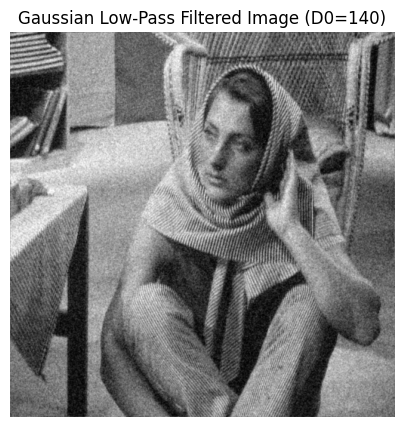

In [31]:
def gaussian_lowpass_filter(shape, D0):
    """Creates a Gaussian Low-Pass Filter."""
    c_x, c_y = np.floor(shape[0] / 2), np.floor(shape[1] / 2)
    ii, jj = np.meshgrid(range(shape[0]), range(shape[1]), indexing='ij')
    dist = np.sqrt((ii - c_x) ** 2 + (jj - c_y) ** 2)
    
    H_gaussian = np.exp(- (dist ** 2) / (2 * (D0 ** 2)))  # Gaussian formula
    return H_gaussian

def compute_rmse(img1, img2):
    """Computes RMSE between two images."""
    return np.sqrt(np.mean((img1 - img2) ** 2))

# Load noiseless image ('barbara.jpg') for RMSE comparison
img_clean_path = 'barbara.jpg'
img_clean = imageio.imread(img_clean_path).astype(np.float32)

# Try different D0 values and find the best one
best_D0 = None
best_rmse = float('inf')
best_filtered_image = None

D0_values = [20, 40, 60, 80, 100, 120, 125, 130, 135, 140, 150, 145, 160, 180, 200, 320]  # Test different cutoff frequencies

for D0 in D0_values:
    H_gaussian = gaussian_lowpass_filter(img_noisy.shape, D0)
    fft_gaussian_shifted = img_noisy_fft_shifted * H_gaussian

    # Compute inverse DFT
    fft_gaussian = np.fft.ifftshift(fft_gaussian_shifted)
    img_gaussian = np.fft.ifft2(fft_gaussian)
    img_gaussian = np.real(img_gaussian)

    # Compute RMSE
    rmse = compute_rmse(img_gaussian, img_clean)
    print(f"D0 = {D0}, RMSE = {rmse}")

    # Track best D0
    if rmse < best_rmse:
        best_rmse = rmse
        best_D0 = D0
        best_filtered_image = img_gaussian

# Display the best Gaussian LPF result
print(f"Best D0 = {best_D0} with RMSE = {best_rmse}")

plt.figure(figsize=(5,5))
plt.imshow(best_filtered_image, cmap='gray')
plt.axis('off')
plt.title(f"Gaussian Low-Pass Filtered Image (D0={best_D0})")
plt.show()


# Q2) Apply all three HighPass Filter to 'barbara_noisy02.jpg' with $D_0$ as 40,70,and 90 respectively by creating your own function and display the results [4 Marks\]


Applying HPFs with D0 = 40...


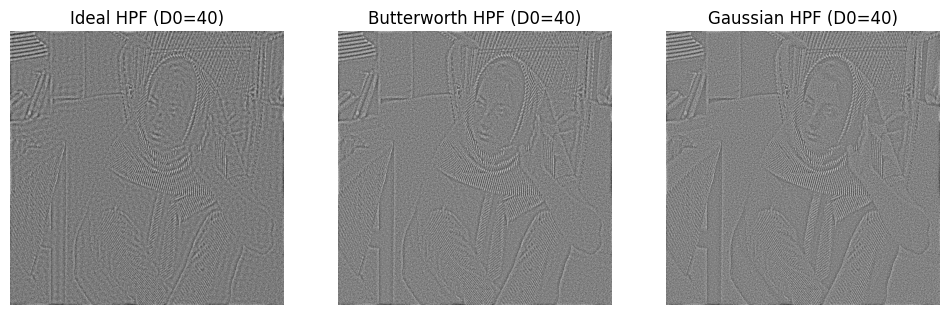


Applying HPFs with D0 = 70...


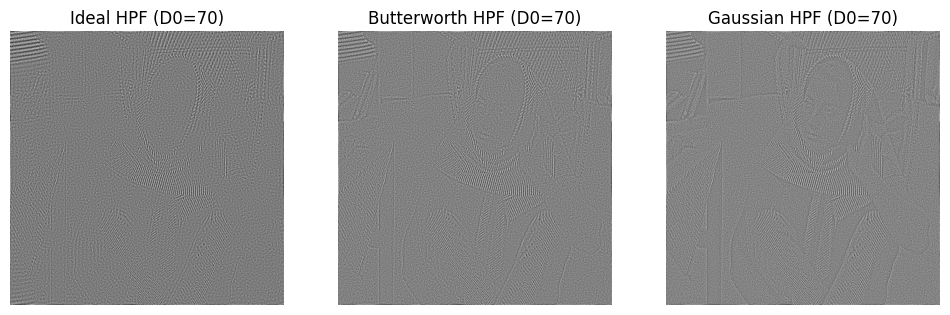


Applying HPFs with D0 = 90...


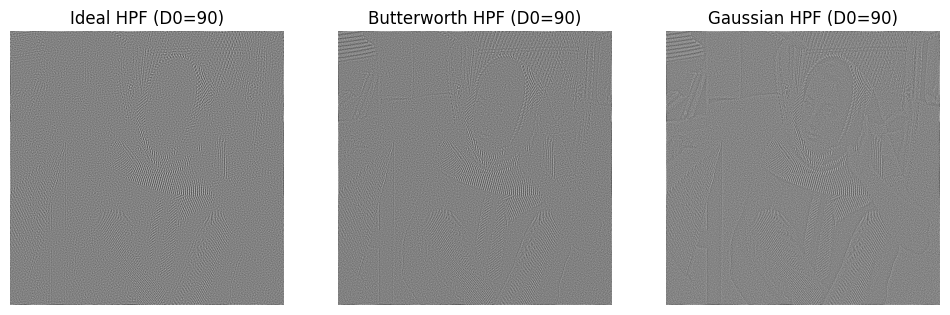

In [32]:
def ideal_highpass_filter(shape, D0):
    """Creates an Ideal High-Pass Filter."""
    c_x, c_y = np.floor(shape[0] / 2), np.floor(shape[1] / 2)
    ii, jj = np.meshgrid(range(shape[0]), range(shape[1]), indexing='ij')
    dist = np.sqrt((ii - c_x) ** 2 + (jj - c_y) ** 2)
    
    H_ideal = (dist > D0).astype(float)  # High-pass condition
    return H_ideal

def butterworth_highpass_filter(shape, D0, n=2):
    """Creates a Butterworth High-Pass Filter."""
    c_x, c_y = np.floor(shape[0] / 2), np.floor(shape[1] / 2)
    ii, jj = np.meshgrid(range(shape[0]), range(shape[1]), indexing='ij')
    dist = np.sqrt((ii - c_x) ** 2 + (jj - c_y) ** 2)
    
    H_butterworth = 1 / (1 + (D0 / (dist + 1e-5)) ** (2 * n))  # Avoid div-by-zero
    return H_butterworth

def gaussian_highpass_filter(shape, D0):
    """Creates a Gaussian High-Pass Filter."""
    c_x, c_y = np.floor(shape[0] / 2), np.floor(shape[1] / 2)
    ii, jj = np.meshgrid(range(shape[0]), range(shape[1]), indexing='ij')
    dist = np.sqrt((ii - c_x) ** 2 + (jj - c_y) ** 2)
    
    H_gaussian = 1 - np.exp(- (dist ** 2) / (2 * (D0 ** 2)))  # Gaussian HPF formula
    return H_gaussian

# Define cutoff frequencies
D0_values = [40, 70, 90]

# Apply each filter and display results
for D0 in D0_values:
    print(f"\nApplying HPFs with D0 = {D0}...")

    # Generate HPFs
    H_ideal = ideal_highpass_filter(img_noisy.shape, D0)
    H_butter = butterworth_highpass_filter(img_noisy.shape, D0)
    H_gaussian = gaussian_highpass_filter(img_noisy.shape, D0)

    # Apply filters in frequency domain
    fft_ideal_shifted = img_noisy_fft_shifted * H_ideal
    fft_butter_shifted = img_noisy_fft_shifted * H_butter
    fft_gaussian_shifted = img_noisy_fft_shifted * H_gaussian

    # Compute inverse DFT
    img_ideal = np.real(np.fft.ifft2(np.fft.ifftshift(fft_ideal_shifted)))
    img_butter = np.real(np.fft.ifft2(np.fft.ifftshift(fft_butter_shifted)))
    img_gaussian = np.real(np.fft.ifft2(np.fft.ifftshift(fft_gaussian_shifted)))

    # Display results
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(img_ideal, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title(f"Ideal HPF (D0={D0})")

    axes[1].imshow(img_butter, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title(f"Butterworth HPF (D0={D0})")

    axes[2].imshow(img_gaussian, cmap='gray')
    axes[2].axis('off')
    axes[2].set_title(f"Gaussian HPF (D0={D0})")

    plt.show()
